In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
resources = ['punkt', 'wordnet','stopwords','averaged_perceptron_tagger']
nltk.download(resources)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science/Projects/Twitter_Data.csv')
df = df[0:2000]
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [4]:
df.shape

(2000, 2)

In [5]:
df.isnull().sum()

clean_text    1
category      0
dtype: int64

In [6]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,clean_text,category
148,NaN,0.0


In [7]:
df = df.dropna()
df.shape


(1999, 2)

In [8]:
df.isnull().sum()

clean_text    0
category      0
dtype: int64

<Axes: xlabel='category', ylabel='Count'>

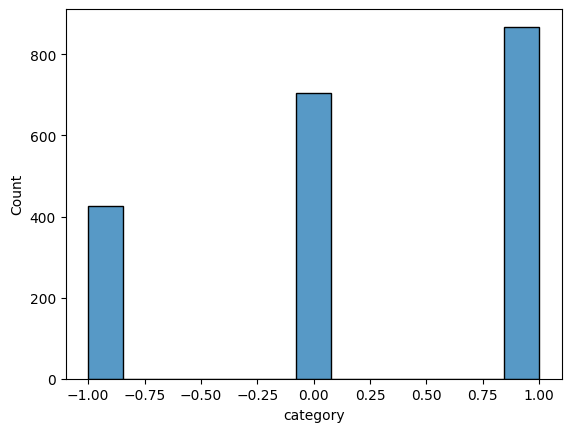

In [9]:
X = df.clean_text
y = df.category

sns.histplot(y)

In [10]:
# To clean the text of non alphabets

X = X.str.replace(r'[^a-zA-Z\s]', '', regex=True)
X

0       when modi promised minimum government maximum ...
1       talk all the nonsense and continue all the dra...
2       what did just say vote for modi  welcome bjp t...
3       asking his supporters prefix chowkidar their n...
4       answer who among these the most powerful world...
                              ...                        
1995    eam have decided not criticise bullshits befor...
1996    modi meetings andhra pradesh march april modi ...
1997    one vote can make all the difference anil kapo...
1998         yes want see this movie great narendra modi 
1999    documents reveal modi and javadekars war india...
Name: clean_text, Length: 1999, dtype: object

In [11]:
# removing numbers and special characters
df['cleaned_text'] = df['clean_text'].str.replace('[^a-zA-Z\s]','',regex=True)

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(sentence):
    sentence = sentence.lower()
    words = sentence.split()
    fil_words = [word for word in words if word not in stop_words]
    new_sentence = ' '.join(fil_words)
    return new_sentence

df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)
df.head()

,clean_text,category,cleaned_text
0,when modi promised “minimum government maximum...,-1.0,modi promised minimum government maximum gover...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,asking supporters prefix chowkidar names modi ...
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...


In [12]:
# Tokenization

from nltk.tokenize import word_tokenize

df['tokens'] = df['cleaned_text'].apply(word_tokenize)
df.head()


,clean_text,category,cleaned_text,tokens
0,when modi promised “minimum government maximum...,-1.0,modi promised minimum government maximum gover...,"[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi,"[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...,"[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,1.0,asking supporters prefix chowkidar names modi ...,"[asking, supporters, prefix, chowkidar, names,..."
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...,"[answer, among, powerful, world, leader, today..."


In [13]:
df.drop(['cleaned_text' ],axis = 1, inplace=True)
df.head()

,clean_text,category,tokens
0,when modi promised “minimum government maximum...,-1.0,"[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,1.0,"[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, supporters, prefix, chowkidar, names,..."
4,answer who among these the most powerful world...,1.0,"[answer, among, powerful, world, leader, today..."


In [92]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn

lemmatizer = WordNetLemmatizer()

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J']: wn.ADJ
tag_map['V']: wn.VERB
tag_map['R']: wn.ADV

In [91]:
token_list = df.tokens[155]
tagged_tokens  = pos_tag(token_list)
tagged_tokens

len(tagged_tokens)
for i in range(len(tagged_tokens)):
    token , tag = tagged_tokens[i]
   # print(tag[0], tag_map[tag[0]])

    final_words = []

    word_final = lemmatizer.lemmatize(token, tag_map[tag[0]])
    final_words.append(word_final)
    print(list(chain(final_words)))
#


['dear']
['modi']
['please']
['uploa']
['ded']
['link']
['post']
['doordarshan']
['india']
['youtube']
['holi']
['celebration']
['santiniketan']


In [93]:
def lemmatize_token_list(token_list):
    tagged_tokens = pos_tag(token_list)
    final_words = []

    for i in range(len(token_list)):
        token , tag = tagged_tokens[i]
        word_final = lemmatizer.lemmatize(token, tag_map[tag[0]])
        final_words.append(word_final)

    return final_words


In [105]:
df['lemma'] = df['tokens'].apply(lemmatize_token_list)
df.head()

,clean_text,category,tokens,lemma
0,when modi promised “minimum government maximum...,-1.0,"[modi, promised, minimum, government, maximum,...","[modi, promise, minimum, government, maximum, ..."
1,talk all the nonsense and continue all the dra...,0.0,"[talk, nonsense, continue, drama, vote, modi]","[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,1.0,"[say, vote, modi, welcome, bjp, told, rahul, m...","[say, vote, modi, welcome, bjp, tell, rahul, m..."
3,asking his supporters prefix chowkidar their n...,1.0,"[asking, supporters, prefix, chowkidar, names,...","[ask, supporter, prefix, chowkidar, name, modi..."
4,answer who among these the most powerful world...,1.0,"[answer, among, powerful, world, leader, today...","[answer, among, powerful, world, leader, today..."
